In [2]:
from emoji_playground import *
from PIL import Image
import matplotlib.pyplot as plt
import requests

import io
import numpy as np
from numpy import asarray

from skimage.transform import swirl, PiecewiseAffineTransform, warp
from skimage.filters import butterworth


from skimage.transform import radon, rescale
from skimage.color import rgba2rgb,rgb2gray
from skimage.transform import iradon

plt.rcParams['figure.dpi'] = 150  

def show(img , cmap = "gray"):
    plt.imshow(img , cmap)
    plt.axis("off")

In [3]:
current_emoji = "🐶"
current_filter_name = current_filter_name 

emoji_code = "-".join(f"{ord(c):x}" for c in current_emoji).upper()
url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
emoji_data = Image.open(requests.get(url, stream=True).raw)
emoji_data = np.array(emoji_data.convert("RGBA")) 


/Users/jan-hendrik/projects/pyscript-emoji-skimage/emoji_skimage_env/lib/python3.10/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


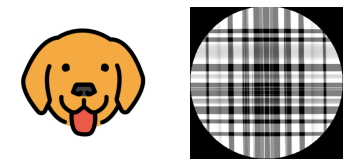

In [5]:
current_filter_name ='nur_2_bilder'
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
show(filtered_image)

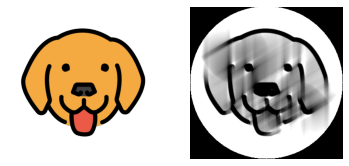

In [4]:
current_filter_name ='radon_iradon_missing'
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
show(filtered_image)

In [5]:
def good_tomo(emoji_data):
    image = rgb2gray(rgba2rgb(emoji_data)) # remove alpha channel and convert to gray
    image = rescale(image, scale=0.5, mode='reflect', channel_axis=None)
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    reconstruction_fbp = iradon(sinogram, theta= theta, filter_name='shepp-logan')
    new1 = np.clip((reconstruction_fbp)/0.9, 0,1)
    return new1


def tomo_missing_angle_clip(emoji_data,fromangle,toangle):
    total_angle = 180
    image = rgb2gray(rgba2rgb(emoji_data)) # remove alpha channel and convert to gray
    image = rescale(image, scale=0.5, mode='reflect', channel_axis=None)
    fromangle = int(fromangle* max(image.shape)/total_angle)  # TODO radon images = max(image.shape) and angle = 180
    toangle = int(toangle* max(image.shape)/total_angle )
    theta = np.linspace(0., total_angle, max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)

    theta = theta[fromangle:toangle]
    sinogram=sinogram[:,fromangle:toangle]

    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='shepp-logan')
    new1 = np.clip((reconstruction_fbp)/0.9, 0,1)
    return new1
    
def tomo_missing_angle_cutout(emoji_data,fromangle,toangle):
    total_angle = 180
    image = rgb2gray(rgba2rgb(emoji_data)) # remove alpha channel and convert to gray
    image = rescale(image, scale=0.5, mode='reflect', channel_axis=None)
    fromangle = int(fromangle* max(image.shape)/total_angle)  # TODO radon images = max(image.shape) and angle = 180
    toangle = int(toangle* max(image.shape)/total_angle )
    theta = np.linspace(0., total_angle, max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)


    theta = np.delete(theta, range(fromangle,toangle), axis=0)
    sinogram = np.delete(sinogram, range(fromangle,toangle), axis=1)
    
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='shepp-logan')
    new1 = np.clip((reconstruction_fbp)/0.9, 0,1)
    return new1


def radon180_but_less_images(emoji_data, less = 20):
    image = rgb2gray(rgba2rgb(emoji_data)) # remove alpha channel and convert to gray
    image = rescale(image, scale=0.5, mode='reflect', channel_axis=None)
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    reconstruction_fbp = iradon(sinogram[:,::less], theta=theta[::less], filter_name='shepp-logan')
    new1 = np.clip((reconstruction_fbp)/0.9, 0,1)
    return new1

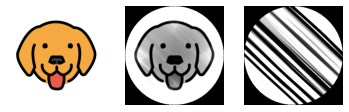

In [6]:
plt.subplot(1,3,1)
show(emoji_data)

plt.subplot(1,3,2)
filtered_image = tomo_missing_angle_cutout(emoji_data, fromangle= 45,toangle = 50)
show(filtered_image)
plt.subplot(1,3,3)
filtered_image = tomo_missing_angle_clip(emoji_data, fromangle= 45,toangle = 50)

show(filtered_image)

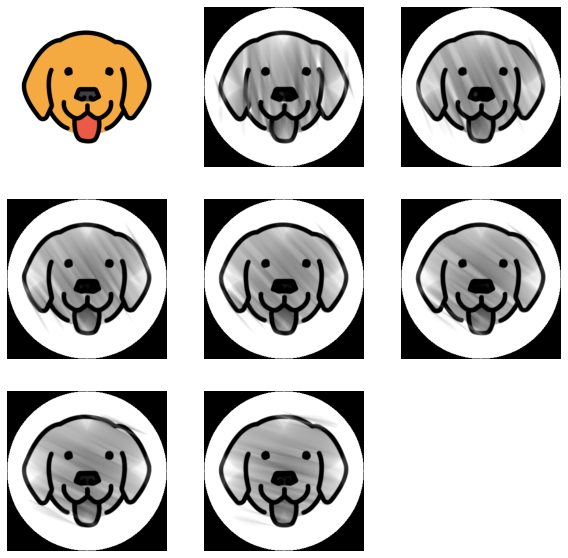

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
show(emoji_data)

plt.subplot(3,3,2)
filtered_image = tomo_missing_angle_cutout(emoji_data, fromangle= 0,toangle = 20)
show(filtered_image)

plt.subplot(3,3,3)
filtered_image = tomo_missing_angle_cutout(emoji_data, fromangle= 20,toangle = 30)
show(filtered_image)

plt.subplot(3,3,4)
filtered_image = tomo_missing_angle_cutout(emoji_data, fromangle= 30,toangle = 40)
show(filtered_image)

plt.subplot(3,3,5)
filtered_image = tomo_missing_angle_cutout(emoji_data, fromangle= 40,toangle = 50)
show(filtered_image)

plt.subplot(3,3,6)
filtered_image = tomo_missing_angle_cutout(emoji_data, fromangle= 50,toangle = 60)
show(filtered_image)

plt.subplot(3,3,7)
filtered_image = tomo_missing_angle_cutout(emoji_data, fromangle= 60,toangle = 70)
show(filtered_image)

plt.subplot(3,3,8)
filtered_image = tomo_missing_angle_cutout(emoji_data, fromangle= 70,toangle = 80)
show(filtered_image)

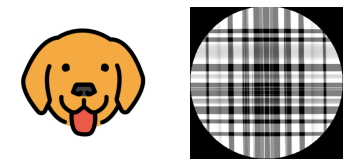

In [8]:
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = tomo_missing_angle_clip(emoji_data, fromangle= 0,toangle = 2) + tomo_missing_angle_clip(emoji_data, fromangle= 90,toangle = 91)
show(filtered_image)

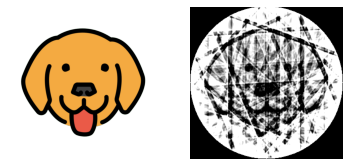

In [11]:
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = radon180_but_less_images(emoji_data, less = 40)
show(filtered_image)

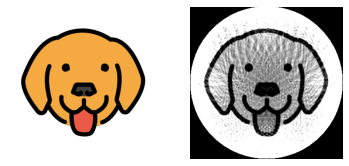

In [12]:
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = radon180_but_less_images(emoji_data, less = 10)
show(filtered_image)